# _Romeo and Juliet_: A Quantitative Analysis

#### Written by William Shakespeare, text obtained from gutenberg.org

### Open the text file

1. Open the file
2. Store the file contents as a String
3. Convert all characters in the String to lower case
4. Remove special characters
5. Split into a list of individual words

In [2]:
# Open the "rj.txt" file and save as a variable
play = open("rj.txt")
    
# Convert play to a String:
full_text = play.read()

# Make all lowercase:
full_text = full_text.lower()

# Remove (most) special characters
character_list = [":", ".", ",", "?", "!", "#", "[", "]"]
for character in character_list:
    full_text = full_text.replace(character, "")
    
# split into a list of individual words
word_list = full_text.split()

# print the list of words:    
print(word_list[:50])

['ï»¿the', 'tragedy', 'of', 'romeo', 'and', 'juliet', 'by', 'william', 'shakespeare', 'dramatis', 'personae', 'chorus', 'escalus', 'prince', 'of', 'verona', 'paris', 'a', 'young', 'count', 'kinsman', 'to', 'the', 'prince', 'montague', 'heads', 'of', 'two', 'houses', 'at', 'variance', 'with', 'each', 'other', 'capulet', 'heads', 'of', 'two', 'houses', 'at', 'variance', 'with', 'each', 'other', 'an', 'old', 'man', 'of', 'the', 'capulet']


#### Question: What is the word count of this file?

In [3]:
# Word count
print(len(word_list))

25788


#### Question: What are the most common words in this play?

In [4]:
# Import the collections library, save the Counter module as a variable
import collections
count = collections.Counter

# Use the Counter module to get a list of words in the play sorted by frequency:
word_frequencies = count(word_list)

# Print
print(word_frequencies)

Counter({'and': 712, 'the': 676, 'i': 572, 'to': 540, 'a': 461, 'of': 401, 'my': 359, 'that': 347, 'is': 342, 'in': 317, 'you': 286, 'thou': 277, 'not': 255, 'me': 255, 'with': 254, 'for': 223, 'this': 223, 'it': 221, 'be': 212, 'but': 183, 'thy': 164, 'what': 163, 'rom': 163, 'as': 155, 'her': 153, 'o': 148, 'will': 146, 'nurse': 145, 'so': 145, 'his': 139, 'thee': 135, 'romeo': 130, 'love': 128, 'have': 125, 'he': 118, 'jul': 117, 'she': 112, 'shall': 110, 'by': 108, 'your': 101, 'no': 99, 'all': 97, 'come': 95, 'him': 94, 'friar': 92, 'do': 89, 'from': 86, 'an': 85, 'if': 83, 'then': 82, 'good': 82, 'enter': 81, 'here': 80, 'now': 79, 'on': 76, 'go': 75, "i'll": 71, 'at': 70, 'or': 70, 'man': 68, 'lady': 67, 'we': 66, 'more': 66, 'are': 65, 'ben': 64, 'hath': 64, 'death': 63, 'which': 63, 'there': 63, 'night': 63, 'mer': 62, 'our': 61, 'one': 61, 'am': 60, 'how': 60, 'they': 59, 'well': 59, 'some': 57, 'too': 56, 'would': 56, 'juliet': 55, 'up': 54, 'art': 53, 'cap': 53, 'tybalt': 5

In [5]:
# Look at the data type for word_frequencies:

print(type(word_frequencies))

<class 'collections.Counter'>


### Now we have a Counter variable (word_frequencies) to work with

#### Use the most_common method to only look at the top 20 instead of ALL words

In [6]:
# The most_common method is self-explanatory:
print("The Top 20 Words:")
for word, frequency in word_frequencies.most_common(20):
    print(word + " : " + str(frequency))

The Top 20 Words:
and : 712
the : 676
i : 572
to : 540
a : 461
of : 401
my : 359
that : 347
is : 342
in : 317
you : 286
thou : 277
not : 255
me : 255
with : 254
for : 223
this : 223
it : 221
be : 212
but : 183


### Many of these words are rather generic
* Let's remove some stop words
  * Stop words - words that get filtered out before processing:

In [7]:
# Download commmon stop words:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venkatakrishnan1297\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Build a list of stop words (words we will filter out)
from nltk.corpus import stopwords
stopword_list = stopwords.words("english")

# Add a few words specific to Romeo and Juliet:
stopword_list.extend(["rom", "jul","i'll","friar","ben","nurse","mer"])

# print out the list
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
# Remove the stop words
for stop in stopword_list:
    del word_frequencies[stop]

# Re-initialize top20 to a dictionary of the most frequent 20 words:
top20 = word_frequencies.most_common(20)

# Print the result:
print(top20)

[('thou', 277), ('thy', 164), ('thee', 135), ('romeo', 130), ('love', 128), ('shall', 110), ('come', 95), ('good', 82), ('enter', 81), ('go', 75), ('man', 68), ('lady', 67), ('hath', 64), ('death', 63), ('night', 63), ('one', 61), ('well', 59), ('would', 56), ('juliet', 55), ('art', 53)]


# Data Visualization
* Humans struggle with obtaining information from data in tables/lists
  * Data visualization: Using graphs/charts to communicate quantitative data
  * Good visualizations can help people gather meaningful insights from data
  
  
* For the rest of this notebook, all necessary code is provided
  * You are still expected to read the code for understanding
  * You may also want to experiment by modifying code or creating your own visualizations
  * Your next project requires you to be a young data scientist!
  * You will be creating visualizations and telling a story with the data
  

### Visualization 1: Frequency Plot 
* Most frequent 20 words (ascending order)
* Data structure featured in this plot: **dictionary**  

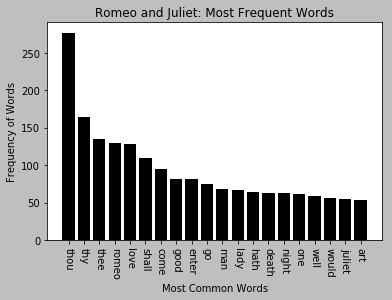

In [10]:
# Convert top20 (currently a List) to a dictionary
top20 = dict(top20)

# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Different styles of graphs (replace the parameter with one of these)
    # fivethirtyeight
    # grayscale
    # dark_background
    # ggplot
    # bmh
plot.style.use("grayscale")

# Titles and labels
plot.title('Romeo and Juliet: Most Frequent Words')
plot.ylabel('Frequency of Words')
plot.xlabel('Most Common Words')

# For bar graph, find the number of values as a range (Ex: Ours is 0-20)
data_range = range(0,len(top20))

# From our dictionary, we want a list of the values (frequencies of words)
value_list = top20.values()

# plot.bar(range of values, values, alignment)
plot.bar(data_range, value_list, align="center")

# From our dictionary, we want a list of keys (words)
word_list_keys = top20.keys()

# plot.xticks(range of values, names of values, rotation of labels)
plot.xticks(data_range, word_list_keys, rotation=270)

# Display graph
plot.show()

### Visualization 2: Another Frequency Plot 
* Most frequent 20 words (in descending order)
* Data structure featured in plot: **list**
  * Note: dictionaries are not meant to be sorted, but we can return a sorted list by using the "sorted()" method
  * the "sorted()" method returns a list

In [11]:
# Import operator
import operator

# Reverse the dictionary
top20Sorted = sorted(top20.items(), key=operator.itemgetter(1), reverse=False)
print (top20Sorted)

[('art', 53), ('juliet', 55), ('would', 56), ('well', 59), ('one', 61), ('death', 63), ('night', 63), ('hath', 64), ('lady', 67), ('man', 68), ('go', 75), ('enter', 81), ('good', 82), ('come', 95), ('shall', 110), ('love', 128), ('romeo', 130), ('thee', 135), ('thy', 164), ('thou', 277)]


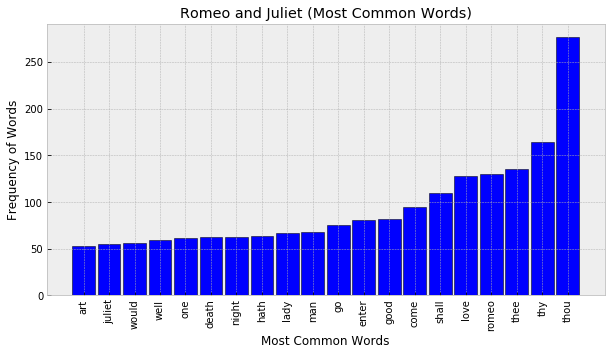

In [20]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Import numpy
import numpy as np

# Style graph
plot.style.use("bmh")  # fivethirtyeight, bmh, grayscale, dark_background, ggplot
plot.figure(figsize=(10,5)) # figsize=(length,width)

# Title and labels
plot.title('Romeo and Juliet (Most Common Words)')
plot.ylabel('Frequency of Words')
plot.xlabel('Most Common Words')

# Grab range of x-values
data_range = range(0,len(top20))

# Graph details
plot.xticks(data_range, word_list_keys, rotation=90)
N = len(top20Sorted) # N - number of items
x = np.arange(1, N+1) # arange(start,stop)
y = [num for (s, num) in top20Sorted] # ["this" for "tuple" in "array"]
labels = [s for (s, num) in top20Sorted] 
width = .9 # Thickness from 0-1 for each bar
bar1 = plot.bar(x, y, width, color="blue", edgecolor = 'black')
plot.xticks(x, labels )

plot.show()

### Visualization 3: Yet Another Frequency Plot 
* Most frequent 20 words (no particular order)
* Data structure featured in plot: **pandas dataframe**
* Pandas is a library designed to make it easier to work with large datasets
  * Pandas offers users 2 new data structures:
    * series
    * dataframes
    

thou      277
thy       164
thee      135
romeo     130
love      128
shall     110
come       95
good       82
enter      81
go         75
man        68
lady       67
hath       64
death      63
night      63
one        61
well       59
would      56
juliet     55
art        53
dtype: int64


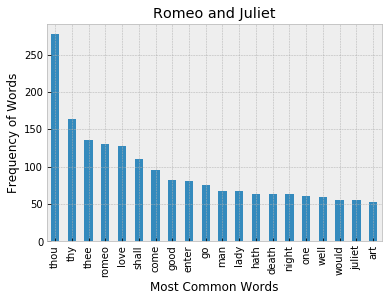

In [13]:
# Import pandas and matplotlib modules
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
plot.figure()

# Create a series (alphabetical)
pdWords = pd.Series(top20)
print(pdWords)

# Graph details
pdWords.plot(kind="bar")
plot.xticks(range(len(top20)), list(pdWords.keys()),rotation=90)
plot.title('Romeo and Juliet')
plot.ylabel('Frequency of Words')
plot.xlabel('Most Common Words')


plot.show()

### Visualization 4: Word Cloud
* Show the most frequent words in a visually-appealing manner
  * The bigger the word, the higher the frequency
  * Does this visualization allow the viewer to gain meaningful insights into the text?

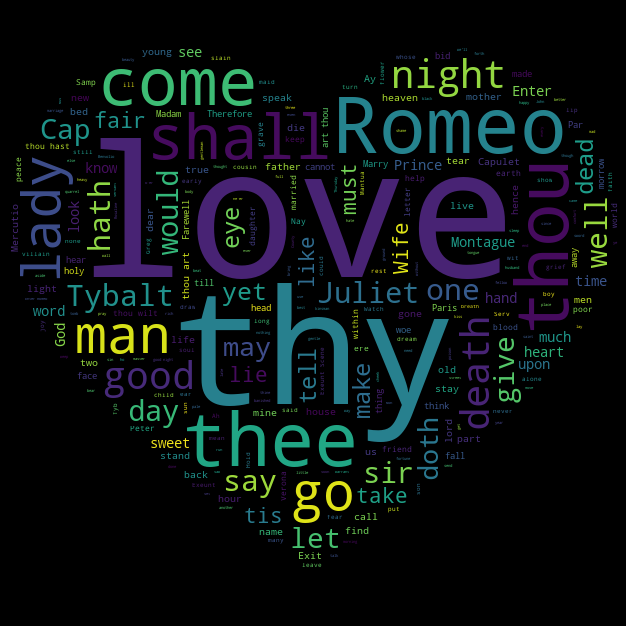

In [14]:
#!/usr/bin/env python
"""
adapted from https://github.com/amueller/word_cloud
"""

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud

d = path.dirname('__file__')

# load an image (heart.png) over which the words will be overlayed
    # note: this is called an "image mask"
    # more info: https://en.wikipedia.org/wiki/Mask_(computing)#Image_masks
mask = np.array(Image.open(path.join(d, "heart.png")))

# Romeo and Juliet text
text = open("rj.txt",encoding = 'utf-8').read()

# add any text-file specific stopwords
stopwords = set(stopword_list)
stopwords.add("Project")
stopwords.add("Gutenberg")

wc = WordCloud(width=4000, height=2000, max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
wc.to_file("finishedWordCloud.png")

from IPython.display import Image
Image("finishedWordCloud.png")

### Visualization 5: Pie Chart
* Research Question: Is there a gender bias in _Romeo and Juliet_?
* Answer: It may be difficult to give a **definitive** answer to this question. However, we can use data to provide evidence supporting the hypothesis that there may be gender bias in _Romeo and Juliet_. 

#### Step 1: Identify a list of gendered nouns (and pronouns)
* Note: these lists are parallel
  * For example, "she" is paired with "he" and "woman" is paired with "man"
  

In [15]:
female_list = ["she", "her", "woman", "girl", "female", "madam", "princess", "my lady", "queen", "juliet", "gentlewoman", "mother","sister","niece", "daughter"] 
male_list = ["he", "his", "man", "boy", "male", "sir", "prince", "my lord", "king", "romeo", "gentleman", "father","brother","nephew","son"]

#### Step 2: Count the instances of these words in the text
* Does the output list imply that "feminine nouns" or "masculine nouns" appear more frequently in the text?

In [16]:
# Create variables
female_count = 0
male_count = 0

# Loop to search for female words
for word in word_list:
    if word in female_list:
        female_count += 1

# Loop to search for male words
for word in word_list:
    if word in male_list:
        male_count += 1

# Create ratio female to male
female_to_male = [female_count, male_count]

print(female_to_male)

[401, 618]


#### Step 3: Display the results in a pie chart

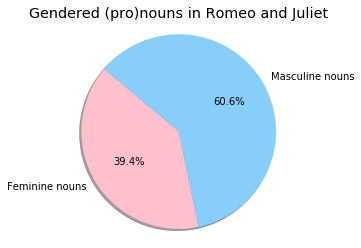

In [17]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plot
 
# Data to plot
labels = 'Feminine nouns', 'Masculine nouns'
sizes = female_to_male
colors = ['pink', 'lightskyblue']
 
# Plot
plot.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plot.title('Gendered (pro)nouns in Romeo and Juliet') 
plot.axis('equal')
plot.show()

#### Step 4: Explain any insights 
* What the data says: There are 6 "masculine nouns" in the text for every 4 "feminine nouns"
* Insight: The data appears to support the hypothesis that there may be gender bias in _Romeo and Juliet_
* Limitations:
  * It is unclear if "gendered-noun frequency" is an adequate quantitative definition of "gender bias"
  * There is likely to be evidence in the text and historical context that we did not consider
  * Further analysis of the text **may** reveal evidence that does not support the hypothesis 

# What does a data scientist do?
* Data science: "an interdisciplinary field of scientific methods, processes, and systems to extract knowledge or insights from data" (Wikipedia)
* A data scientist is not necessarily expected to give a definitive answer to every question posed
  * Instead, a data scientist is often telling a story with the data
  * A single insight from the data is like a piece of a puzzle:
    * The more pieces you have, the more clear the picture becomes
    * But even with many pieces, you still don't necessarily have the entire picture
    * More information from the Harvard Business Review: 
      * https://hbr.org/2015/10/the-best-data-scientists-know-how-to-tell-stories

# Task 1

* Use the following code to create a list of tuples (a,b) where each "a" is a unique word in _Romeo and Juliet_ and "b" is its frequency in the text
  * frequency_list = list(word_frequencies.items())
* A singleton is a word that only appears in the text once. Write code to creates a list, singleton_list, that contains all singletons in the play.
* Print the value of singleton_list

In [37]:


# Use the Counter module to get a list of words in the play sorted by frequency:
singleton = []
for word, frequency in word_frequencies.most_common(len(word_frequencies)):
    if frequency == 1:
        singleton.append(word)
# Print
print(singleton)

['ï»¿the', 'tragedy', 'william', 'shakespeare', 'dramatis', 'personae', 'family', 'houses;', 'pages', 'guards', 'watchmen', 'scene--verona;', 'households', 'dignity', 'grudge', 'unclean', 'loins', 'foes', "star-cross'd", "misadventur'd", 'overthrows', 'passage', "death-mark'd", 'continuance', "children's", "hours'", 'traffic', 'stage;', 'strive', '(with', 'bucklers)', 'coals', 'colliers', 'collar', 'moves', "runn'st", 'slave;', 'weakest', 'true;', 'weaker', 'vessels', 'push', 'masters', 'maids-', 'maidenheads', 'stand;', 'fish;', 'poor-john', 'tool', 'naked', 'sides;', 'list', 'disgrace', "'better'", 'swashing', 'heartless', 'hinds', 'coward', 'bills', 'gown', 'flourishes', 'capulet-', 'train', 'rebellious', 'subjects', 'profaners', 'neighbour-stained', 'steel-', 'beasts', 'pernicious', 'purple', 'fountains', 'issuing', 'throw', 'mistempered', 'bred', 'thrice', "disturb'd", 'beseeming', 'wield', 'freetown', 'abroach', 'adversary', 'fighting', 'instant', "prepar'd;", 'defiance', 'swung'

# Task 2

* Write a line of code that determines how many singletons are in the play

In [39]:
length = len(singleton)
print(length)

2479


# Task 3

* Use the following code to sort the strings in singleton_list from longest to shortest
  * print(sorted(singleton_list, key=len, reverse=True))
* Find two or three words that look unfamiliar, interesting, and school-appropriate. Write each word and its definition below. 
* Tell your English teacher how taking AP Computer Science helped you learn about Shakespeare!

In [40]:
print(sorted(singleton, key=len, reverse=True))

# Wot: A non standard way of writing what
# Assailing: Concentrated or violent attack

["serving-creature's", 'neighbour-stained', 'flattering-sweet', 'wolvish-ravening', "long-experienc'd", 'serving-creature', 'five-and-twenty', 'precious-juiced', "distemp'rature;", 'pricksong-keeps', 'fashion-mongers', "nimble-pinion'd", 'love-performing', 'scene--verona;', 'saint-seducing', 'earth-treading', 'white-upturned', 'loving-jealous', 'love-devouring', "dove-feather'd", 'maiden-widowed', 'unthankfulness', "counterfeit'st", 'tempest-tossed', 'green-sickness', "misadventur'd", 'interchanging', 'transgression', 'candle-holder', 'sir-reverence', 'grasshoppers;', 'court-cubbert', "well-govern'd", 'disparagement', 'tassel-gentle', 'fantasticoes-', "well-flower'd", 'gentlemanlike', 'deliciousness', 'dishonourable', 'death-darting', 'two-and-forty', 'uncomfortable', 'soon-speeding', 'unsubstantial', 'world-wearied', "star-cross'd", "death-mark'd", 'all-cheering', 'well-seeming', 'still-waking', 'without-book', 'dew-dropping', "unlook'd-for", 'truckle-bed;', "overheard'st", 'satisfact